#### Reviewer 1: comment no. 17: 
        Page 14, line 285: by how much do the optimal sensor locations shift?

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
adv0EDML_sensor_depths2006_go_avg=np.load('../output/Discussion/Advection_impact/EDML_0adv_sensor_depths2006_go_avg.npy')
adv64EDML_sensor_depths2006_go_avg=np.load('../output/Discussion/Advection_impact/EDML_adv64_sensor_depths2006_go_avg.npy')
adv230GIRP_sensor_depths2006_go_avg=np.load('../output/Discussion/Advection_impact/GRIP_adv230_sensor_depths2006_go_avg.npy')
adv1000GIRP_sensor_depths2006_go_avg=np.load('../output/Discussion/Advection_impact/GRIP_adv1000_sensor_depths2006_go_avg.npy')

In [3]:
number_sens=np.linspace(0,19,20)+1

Text(0.95, 0.95, '(b)')

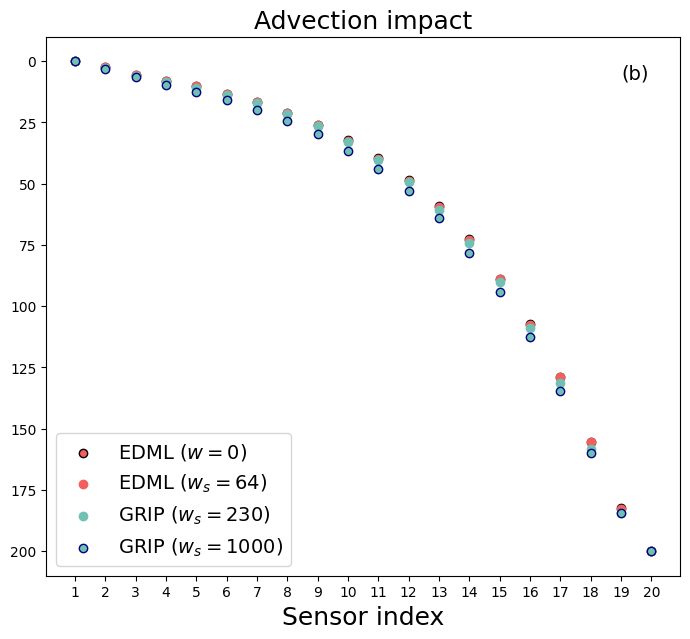

In [4]:
plt.figure(figsize=(18, 7))
ax2 = plt.subplot2grid((1,2), (0, 1),colspan=1,rowspan=1)

#ax2.set_title('Polar amplification %d, beta= %.1f'%(2,0.6),fontsize=18)
#ax2.set_title('Extreme advection impact \n (Polar amplification %d, beta= %.1f)'%(2,0.6),fontsize=18)
ax2.set_title('Advection impact',fontsize=18)
ax2.scatter(number_sens,adv0EDML_sensor_depths2006_go_avg,c='#f25f5c',alpha=1,marker='o', edgecolor='black',label='EDML $(w=0)$')
#ax2.plot(number_sens,EDMLws0_means_2006,color='peru',alpha=0.5,linestyle='--')

ax2.scatter(number_sens,adv64EDML_sensor_depths2006_go_avg,c='#f25f5c',alpha=1,marker='o', label='EDML $(w_{s}=64)$')
#ax2.plot(number_sens,EDML_means_2006,color='maroon',alpha=0.5,linestyle='--')

ax2.scatter(number_sens,adv230GIRP_sensor_depths2006_go_avg,c='#70c1b3',alpha=1,marker='o', label='GRIP $(w_{s}=230)$')
#ax2.plot(number_sens,GRIP_means_2006,color='maroon',alpha=0.5)

ax2.scatter(number_sens,adv1000GIRP_sensor_depths2006_go_avg,c='#70c1b3',alpha=1,marker='o', edgecolor='navy', label='GRIP $(w_{s}=1000)$')
#ax2.plot(number_sens,GRIPws1000_means_2006,color='slategray',alpha=0.5)


ax2.invert_yaxis()
#ax2.legend(handles=[p1b6,p3b6,p2b1,p2b0],fontsize='14',loc='lower left')
ax2.legend(fontsize='14',loc='lower left')
ax2.set_xlabel("Sensor index",fontsize='18')
#ax2.set_ylabel("depth [m]",fontsize='18')
ax2.set_xticks(number_sens)
ax2.text(0.95, 0.95, '(b)', horizontalalignment='right', verticalalignment='top', transform=ax2.transAxes,fontsize=14)





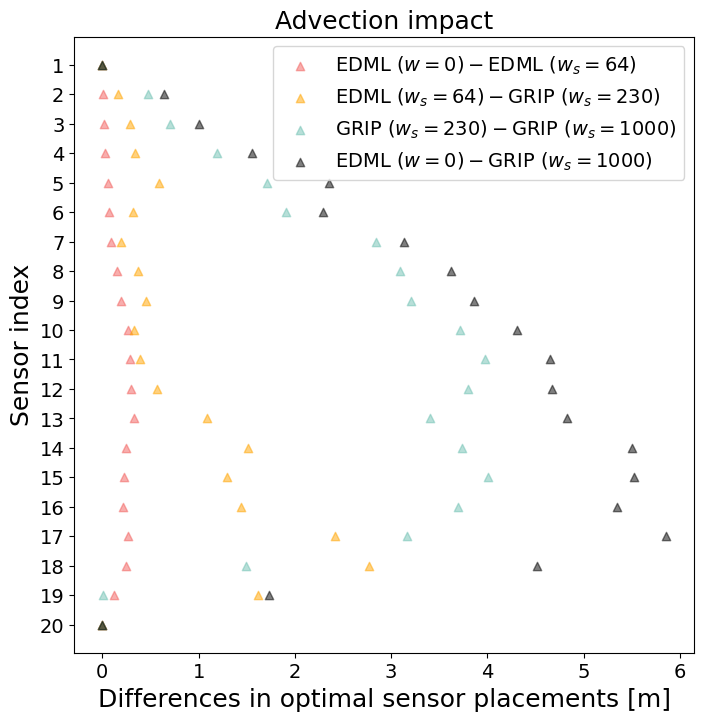

In [5]:
plt.figure(figsize=(8, 8))
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

#ax2.set_title('Polar amplification %d, beta= %.1f'%(2,0.6),fontsize=18)
#ax2.set_title('Extreme advection impact \n (Polar amplification %d, beta= %.1f)'%(2,0.6),fontsize=18)
plt.title('Advection impact',fontsize=18)
plt.scatter(np.abs(adv0EDML_sensor_depths2006_go_avg - adv64EDML_sensor_depths2006_go_avg),number_sens,c='#f25f5c',alpha=0.5,marker='^', label='EDML $(w=0)-$EDML $(w_{s}=64)$')
#ax2.plot(number_sens,EDMLws0_means_2006,color='peru',alpha=0.5,linestyle='--')

plt.scatter(np.abs(adv64EDML_sensor_depths2006_go_avg-adv230GIRP_sensor_depths2006_go_avg),number_sens,c='orange',alpha=0.5,marker='^', label='EDML $(w_{s}=64)-$GRIP $(w_{s}=230)$')
#ax2.plot(number_sens,EDML_means_2006,color='maroon',alpha=0.5,linestyle='--')

plt.scatter(np.abs(adv230GIRP_sensor_depths2006_go_avg-adv1000GIRP_sensor_depths2006_go_avg),number_sens,c='#70c1b3',alpha=0.5,marker='^', label='GRIP $(w_{s}=230)-$GRIP $(w_{s}=1000)$')
#ax2.plot(number_sens,GRIP_means_2006,color='maroon',alpha=0.5)

plt.scatter(np.abs(adv0EDML_sensor_depths2006_go_avg-adv1000GIRP_sensor_depths2006_go_avg),number_sens,c='black',alpha=0.5,marker='^', label='EDML $(w=0)-$GRIP $(w_{s}=1000)$')
#ax2.plot(number_sens,GRIP_means_2006,color='maroon',alpha=0.5)


#ax2.legend(handles=[p1b6,p3b6,p2b1,p2b0],fontsize='14',loc='lower left')
plt.legend(fontsize='14',loc='upper right')
plt.ylabel("Sensor index",fontsize='18')
plt.xlabel("Differences in optimal sensor placements [m]",fontsize='18')
#ax2.set_ylabel("depth [m]",fontsize='18')
plt.yticks(number_sens)
#plt.text(0.95, 0.95, '(b)', horizontalalignment='right', verticalalignment='top', transform=ax2.transAxes,fontsize=14)
plt.gca().invert_yaxis()




#### Reviewer 2: Sensor failure

In [6]:
EDML_res_sensor_10derr_sensor_depths_linear={}
EDML_res_sensor_10derr_accumulated_error_linear={}

EDML_res_sensor_10derr_sensor_depths_logarthmic={}
EDML_res_sensor_10derr_accumulated_error_logarthmic={}

EDML_res_sensor_10derr_sensor_depths_go_avg={}
EDML_res_sensor_10derr_accumulated_error_go_avg={}


rm_sensors=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for sn in rm_sensors:
    EDML_res_sensor_10derr_sensor_depths_linear[sn]= np.load('../output/EDML_varying_sensors_5_20/device_error_10mK/EDML_res_%dsensor_10derr_sensor_depths_linear.npy'%(sn))
    EDML_res_sensor_10derr_accumulated_error_linear[sn]=np.load('../output/EDML_varying_sensors_5_20/device_error_10mK/EDML_res_%dsensor_10derr_accumulated_error_linear.npy'%(sn))
    
    EDML_res_sensor_10derr_sensor_depths_logarthmic[sn]=np.load('../output/EDML_varying_sensors_5_20/device_error_10mK/EDML_res_%dsensor_10derr_sensor_depths_logarthmic.npy'%(sn))
    EDML_res_sensor_10derr_accumulated_error_logarthmic[sn]=np.load('../output/EDML_varying_sensors_5_20/device_error_10mK/EDML_res_%dsensor_10derr_accumulated_error_logarthmic.npy'%(sn))
    
    EDML_res_sensor_10derr_sensor_depths_go_avg[sn]= np.load('../output/EDML_varying_sensors_5_20/device_error_10mK/EDML_res_%dsensor_10derr_sensor_depths_go_avg.npy'%(sn))
    EDML_res_sensor_10derr_accumulated_error_go_avg[sn]=np.load('../output/EDML_varying_sensors_5_20/device_error_10mK/EDML_res_%dsensor_10derr_accumulated_error_go_avg.npy'%(sn))


In [7]:
import numpy as np
import dill
import random
from scipy.interpolate import CubicSpline
from scipy.stats import qmc

from sampling_error_calculation import do_sensor_analysis
from greedy_optimal_sampling import generate_optimized_sensor_locations_candiate_set



In [8]:
go_status='okay'
    
random.seed(9001)
    
#    2D arrays containing 10 borehole simulations w.r.t 10 corresponting surface temperatures
T_end1000 = np.load('../data_borehole_simulations/EDML_simulations/EDML_PA10_simulation_10.npy')
T_end1006 = np.load('../data_borehole_simulations/EDML_simulations/EDML_PA1_6_simulation_10.npy')
T_end1001 = np.load('../data_borehole_simulations/EDML_simulations/EDML_PA11_simulation_10.npy')
T_end2000 = np.load('../data_borehole_simulations/EDML_simulations/EDML_PA20_simulation_10.npy')
T_end2006 = np.load('../data_borehole_simulations/EDML_simulations/EDML_PA2_6_simulation_10.npy')
T_end2001 = np.load('../data_borehole_simulations/EDML_simulations/EDML_PA21_simulation_10.npy')
T_end3000 = np.load('../data_borehole_simulations/EDML_simulations/EDML_PA30_simulation_10.npy')
T_end3006 = np.load('../data_borehole_simulations/EDML_simulations/EDML_PA3_6_simulation_10.npy')
T_end3001 = np.load('../data_borehole_simulations/EDML_simulations/EDML_PA31_simulation_10.npy')

t_grid = np.load('../data_borehole_simulations/EDML_simulations/EDML_sample_times_fwd.npy')
z_grid = np.load('../data_borehole_simulations/EDML_simulations/EDML_sample_depths_fwd.npy')

N_z = z_grid.size
N_t = t_grid.size

borehole_simulations=np.zeros((z_grid.size,90))

borehole_simulations[:,0:10]=T_end1000.T
borehole_simulations[:,10:20]=T_end1006.T
borehole_simulations[:,20:30]=T_end1001.T

borehole_simulations[:,30:40]=T_end2000.T
borehole_simulations[:,40:50]=T_end2006.T
borehole_simulations[:,50:60]=T_end2001.T

borehole_simulations[:,60:70]=T_end3000.T
borehole_simulations[:,70:80]=T_end3006.T
borehole_simulations[:,80:90]=T_end3001.T

used_profiles = []
idx = 0
for pa in [1,2,3]:
    for beta in [0,0.6,1]:
        for k in range(10):
            used_profiles.append(idx)
            idx = idx + 1


In [9]:
sensor_min_depth = 0
sensor_max_depth = 200
sensor_count = 20
sensor_std = 0.01 # std dev of the error

error_grid_size = 100000
error_grid = np.linspace(sensor_min_depth,sensor_max_depth, num=error_grid_size, endpoint=True)
# error_grid_delta = error_grid[1]-error_grid[0] #deprecated

In [10]:
sublists_linear_20 = []
sublists_accumulation_error_linear_20 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_linear[20])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_linear_20.append(sublist)
    accumulated_error_linear, errors_linear = do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_linear_20.append(accumulated_error_linear)

In [11]:
sublists_log_20 = []
sublists_accumulation_error_log_20 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_logarthmic[20])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_log_20.append(sublist)
    accumulated_error_logarthmic, errors_logarthmic = do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_log_20.append(accumulated_error_logarthmic)

In [12]:
sublists_goa_20 = []
sublists_accumulation_error_goa_20 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_go_avg[20])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_goa_20.append(sublist)
    accumulated_error_go_avg, errors_go_avg= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_goa_20.append(accumulated_error_go_avg)

In [13]:
sublists_goa_11 = []
sublists_accumulation_error_goa_11 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_go_avg[11])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_goa_11.append(sublist)
    accumulated_error_go_avg, errors_go_avg= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_goa_11.append(accumulated_error_go_avg)
    
sublists_logarthmic_11 = []
sublists_accumulation_error_logarthmic_11 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_logarthmic[11])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_logarthmic_11.append(sublist)
    accumulated_error_logarthmic_11, errors_logarthmic_11= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_logarthmic_11.append(accumulated_error_logarthmic_11)
    
sublists_linear_11 = []
sublists_accumulation_error_linear_11 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_linear[11])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_linear_11.append(sublist)
    accumulated_error_linear_11, errors_linear_11= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_linear_11.append(accumulated_error_linear_11)

In [14]:
sublists_goa_12 = []
sublists_accumulation_error_goa_12 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_go_avg[12])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_goa_12.append(sublist)
    accumulated_error_go_avg, errors_go_avg= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_goa_12.append(accumulated_error_go_avg)
    
sublists_logarthmic_12 = []
sublists_accumulation_error_logarthmic_12 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_logarthmic[12])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_logarthmic_12.append(sublist)
    accumulated_error_logarthmic_12, errors_logarthmic_12= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_logarthmic_12.append(accumulated_error_logarthmic_12)
    
sublists_linear_12 = []
sublists_accumulation_error_linear_12 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_linear[12])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_linear_12.append(sublist)
    accumulated_error_linear_12, errors_linear_12= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_linear_12.append(accumulated_error_linear_12)

In [15]:
sublists_goa_13 = []
sublists_accumulation_error_goa_13 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_go_avg[13])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_goa_13.append(sublist)
    accumulated_error_go_avg, errors_go_avg= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_goa_13.append(accumulated_error_go_avg)
    
sublists_logarthmic_13 = []
sublists_accumulation_error_logarthmic_13 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_logarthmic[13])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_logarthmic_13.append(sublist)
    accumulated_error_logarthmic_13, errors_logarthmic_13= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_logarthmic_13.append(accumulated_error_logarthmic_13)
    
sublists_linear_13 = []
sublists_accumulation_error_linear_13 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_linear[13])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_linear_13.append(sublist)
    accumulated_error_linear_13, errors_linear_13= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_linear_13.append(accumulated_error_linear_13)

In [16]:
sublists_goa_14 = []
sublists_accumulation_error_goa_14 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_go_avg[14])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_goa_14.append(sublist)
    accumulated_error_go_avg, errors_go_avg= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_goa_14.append(accumulated_error_go_avg)
    
sublists_logarthmic_14 = []
sublists_accumulation_error_logarthmic_14 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_logarthmic[14])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_logarthmic_14.append(sublist)
    accumulated_error_logarthmic_14, errors_logarthmic_14= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_logarthmic_14.append(accumulated_error_logarthmic_14)
    
sublists_linear_14 = []
sublists_accumulation_error_linear_14 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_linear[14])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_linear_14.append(sublist)
    accumulated_error_linear_14, errors_linear_14= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_linear_14.append(accumulated_error_linear_14)

In [17]:
sublists_goa_15 = []
sublists_accumulation_error_goa_15 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_go_avg[15])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_goa_15.append(sublist)
    accumulated_error_go_avg, errors_go_avg= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_goa_15.append(accumulated_error_go_avg)
    
sublists_logarthmic_15 = []
sublists_accumulation_error_logarthmic_15 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_logarthmic[15])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_logarthmic_15.append(sublist)
    accumulated_error_logarthmic_15, errors_logarthmic_15= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_logarthmic_15.append(accumulated_error_logarthmic_15)
    
sublists_linear_15 = []
sublists_accumulation_error_linear_15 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_linear[15])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_linear_15.append(sublist)
    accumulated_error_linear_15, errors_linear_15= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_linear_15.append(accumulated_error_linear_15)

In [18]:
sublists_goa_16 = []
sublists_accumulation_error_goa_16 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_go_avg[16])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_goa_16.append(sublist)
    accumulated_error_go_avg, errors_go_avg= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_goa_16.append(accumulated_error_go_avg)
    
sublists_logarthmic_16 = []
sublists_accumulation_error_logarthmic_16 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_logarthmic[16])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_logarthmic_16.append(sublist)
    accumulated_error_logarthmic_16, errors_logarthmic_16= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_logarthmic_16.append(accumulated_error_logarthmic_16)
    
sublists_linear_16 = []
sublists_accumulation_error_linear_16 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_linear[16])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_linear_16.append(sublist)
    accumulated_error_linear_16, errors_linear_16= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_linear_16.append(accumulated_error_linear_16)

In [19]:
sublists_goa_17 = []
sublists_accumulation_error_goa_17 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_go_avg[17])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_goa_17.append(sublist)
    accumulated_error_go_avg, errors_go_avg= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_goa_17.append(accumulated_error_go_avg)
    
sublists_logarthmic_17 = []
sublists_accumulation_error_logarthmic_17 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_logarthmic[17])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_logarthmic_17.append(sublist)
    accumulated_error_logarthmic_17, errors_logarthmic_17= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_logarthmic_17.append(accumulated_error_logarthmic_17)
    
sublists_linear_17 = []
sublists_accumulation_error_linear_17 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_linear[17])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_linear_17.append(sublist)
    accumulated_error_linear_17, errors_linear_17= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_linear_17.append(accumulated_error_linear_17)

In [20]:
sublists_goa_18 = []
sublists_accumulation_error_goa_18 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_go_avg[18])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_goa_18.append(sublist)
    accumulated_error_go_avg, errors_go_avg= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_goa_18.append(accumulated_error_go_avg)
    
sublists_logarthmic_18 = []
sublists_accumulation_error_logarthmic_18 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_logarthmic[18])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_logarthmic_18.append(sublist)
    accumulated_error_logarthmic_18, errors_logarthmic_18= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_logarthmic_18.append(accumulated_error_logarthmic_18)
    
sublists_linear_18 = []
sublists_accumulation_error_linear_18 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_linear[18])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_linear_18.append(sublist)
    accumulated_error_linear_18, errors_linear_18= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_linear_18.append(accumulated_error_linear_18)

In [21]:
sublists_goa_19 = []
sublists_accumulation_error_goa_19 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_go_avg[19])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_goa_19.append(sublist)
    accumulated_error_go_avg, errors_go_avg= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_goa_19.append(accumulated_error_go_avg)
    
sublists_logarthmic_19 = []
sublists_accumulation_error_logarthmic_19 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_logarthmic[19])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_logarthmic_19.append(sublist)
    accumulated_error_logarthmic_19, errors_logarthmic_19= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_logarthmic_19.append(accumulated_error_logarthmic_19)
    
sublists_linear_19 = []
sublists_accumulation_error_linear_19 = []
my_list=tuple(EDML_res_sensor_10derr_sensor_depths_linear[19])
for i in range(1, len(my_list) - 1):
    sublist = my_list[:i] + my_list[i+1:]
    sublists_linear_19.append(sublist)
    accumulated_error_linear_19, errors_linear_19= do_sensor_analysis(borehole_simulations,np.array(sublist), sensor_std, z_grid, error_grid, used_profiles)
    sublists_accumulation_error_linear_19.append(accumulated_error_linear_19)

In [22]:
sensor_removal = list(range(2, 20))

In [23]:
sensor_removal_11 = list(range(2, 11))
sensor_removal_12 = list(range(2, 12))
sensor_removal_13 = list(range(2, 13))
sensor_removal_14 = list(range(2, 14))
sensor_removal_15 = list(range(2, 15))
sensor_removal_16 = list(range(2, 16))
sensor_removal_17 = list(range(2, 17))
sensor_removal_18 = list(range(2, 18))
sensor_removal_19 = list(range(2, 19))

In [24]:
max_err_sensor_removal_logarithmic=np.zeros(len(sensor_removal))
max_err_sensor_removal_linear=np.zeros(len(sensor_removal))
max_err_sensor_removal_goa_avg=np.zeros(len(sensor_removal))

max_err_sensor_removal_goa_avg_11=np.zeros(len(sensor_removal_11))
max_err_sensor_removal_goa_avg_12=np.zeros(len(sensor_removal_12))
max_err_sensor_removal_goa_avg_13=np.zeros(len(sensor_removal_13))
max_err_sensor_removal_goa_avg_14=np.zeros(len(sensor_removal_14))
max_err_sensor_removal_goa_avg_15=np.zeros(len(sensor_removal_15))
max_err_sensor_removal_goa_avg_16=np.zeros(len(sensor_removal_16))
max_err_sensor_removal_goa_avg_17=np.zeros(len(sensor_removal_17))
max_err_sensor_removal_goa_avg_18=np.zeros(len(sensor_removal_18))
max_err_sensor_removal_goa_avg_19=np.zeros(len(sensor_removal_19))

max_err_sensor_removal_linear_11=np.zeros(len(sensor_removal_11))
max_err_sensor_removal_linear_12=np.zeros(len(sensor_removal_12))
max_err_sensor_removal_linear_13=np.zeros(len(sensor_removal_13))
max_err_sensor_removal_linear_14=np.zeros(len(sensor_removal_14))
max_err_sensor_removal_linear_15=np.zeros(len(sensor_removal_15))
max_err_sensor_removal_linear_16=np.zeros(len(sensor_removal_16))
max_err_sensor_removal_linear_17=np.zeros(len(sensor_removal_17))
max_err_sensor_removal_linear_18=np.zeros(len(sensor_removal_18))
max_err_sensor_removal_linear_19=np.zeros(len(sensor_removal_19))

max_err_sensor_removal_logarthmic_11=np.zeros(len(sensor_removal_11))
max_err_sensor_removal_logarthmic_12=np.zeros(len(sensor_removal_12))
max_err_sensor_removal_logarthmic_13=np.zeros(len(sensor_removal_13))
max_err_sensor_removal_logarthmic_14=np.zeros(len(sensor_removal_14))
max_err_sensor_removal_logarthmic_15=np.zeros(len(sensor_removal_15))
max_err_sensor_removal_logarthmic_16=np.zeros(len(sensor_removal_16))
max_err_sensor_removal_logarthmic_17=np.zeros(len(sensor_removal_17))
max_err_sensor_removal_logarthmic_18=np.zeros(len(sensor_removal_18))
max_err_sensor_removal_logarthmic_19=np.zeros(len(sensor_removal_19))

In [25]:
for i in range(len(sensor_removal)):
    max_err_sensor_removal_logarithmic[i]=np.max(sublists_accumulation_error_log_20[i])
    max_err_sensor_removal_linear[i]=np.max(sublists_accumulation_error_linear_20[i])
    max_err_sensor_removal_goa_avg[i]=np.max(sublists_accumulation_error_goa_20[i])


In [27]:
list(max_err_sensor_removal_linear*1000)

[np.float64(279.85036861055517),
 np.float64(165.10024538180693),
 np.float64(127.36153311998439),
 np.float64(124.08144919144665),
 np.float64(123.87085053766721),
 np.float64(123.84902930612161),
 np.float64(123.84785980663239),
 np.float64(123.84802051513167),
 np.float64(123.84770531861491),
 np.float64(123.84766885114091),
 np.float64(123.84768206679165),
 np.float64(123.84768308045484),
 np.float64(123.84768229318243),
 np.float64(123.8476824160494),
 np.float64(123.84768248231197),
 np.float64(123.84768247148922),
 np.float64(123.84768246410599),
 np.float64(123.84768246310064)]

In [28]:
list(max_err_sensor_removal_logarithmic*1000)

[np.float64(16.094179511691422),
 np.float64(16.09417900127591),
 np.float64(16.094178213025746),
 np.float64(16.094180464808076),
 np.float64(16.094181555814263),
 np.float64(16.131236697131623),
 np.float64(16.094269336664222),
 np.float64(16.09427723260539),
 np.float64(16.093092580647617),
 np.float64(16.09323424320092),
 np.float64(16.4613459430296),
 np.float64(16.076825208756247),
 np.float64(16.04013117713415),
 np.float64(15.918682531891884),
 np.float64(15.551643157536718),
 np.float64(14.672648661307008),
 np.float64(16.970045616602583),
 np.float64(58.24819975802993)]

In [29]:
list(max_err_sensor_removal_goa_avg*1000)

[np.float64(17.263927067273777),
 np.float64(13.568594815762985),
 np.float64(22.742847100605054),
 np.float64(13.557985556862679),
 np.float64(11.855426257693761),
 np.float64(14.691704928858162),
 np.float64(14.186047653214965),
 np.float64(11.931089246077136),
 np.float64(12.882109730377927),
 np.float64(12.879821096397954),
 np.float64(11.937170785367437),
 np.float64(12.43105530056569),
 np.float64(11.614980182335648),
 np.float64(12.476808689018599),
 np.float64(12.413521359156132),
 np.float64(12.269813892785677),
 np.float64(14.362369105975409),
 np.float64(22.57665241360751)]

In [30]:
for i in range(len(sensor_removal_11)):    
    max_err_sensor_removal_goa_avg_11[i]=np.max(sublists_accumulation_error_goa_11[i])
    
for i in range(len(sensor_removal_12)):    
    max_err_sensor_removal_goa_avg_12[i]=np.max(sublists_accumulation_error_goa_12[i])
    
for i in range(len(sensor_removal_13)):    
    max_err_sensor_removal_goa_avg_13[i]=np.max(sublists_accumulation_error_goa_13[i])
    
for i in range(len(sensor_removal_14)):    
    max_err_sensor_removal_goa_avg_14[i]=np.max(sublists_accumulation_error_goa_14[i])
    
for i in range(len(sensor_removal_15)):    
    max_err_sensor_removal_goa_avg_15[i]=np.max(sublists_accumulation_error_goa_15[i])
    
for i in range(len(sensor_removal_16)):    
    max_err_sensor_removal_goa_avg_16[i]=np.max(sublists_accumulation_error_goa_16[i])
    
for i in range(len(sensor_removal_17)):    
    max_err_sensor_removal_goa_avg_17[i]=np.max(sublists_accumulation_error_goa_17[i])
    
for i in range(len(sensor_removal_18)):    
    max_err_sensor_removal_goa_avg_18[i]=np.max(sublists_accumulation_error_goa_18[i])
    
for i in range(len(sensor_removal_19)):    
    max_err_sensor_removal_goa_avg_19[i]=np.max(sublists_accumulation_error_goa_19[i])

In [31]:
for i in range(len(sensor_removal_11)):    
    max_err_sensor_removal_logarthmic_11[i]=np.max(sublists_accumulation_error_logarthmic_11[i])
    
for i in range(len(sensor_removal_12)):    
    max_err_sensor_removal_logarthmic_12[i]=np.max(sublists_accumulation_error_logarthmic_12[i])
    
for i in range(len(sensor_removal_13)):    
    max_err_sensor_removal_logarthmic_13[i]=np.max(sublists_accumulation_error_logarthmic_13[i])
    
for i in range(len(sensor_removal_14)):    
    max_err_sensor_removal_logarthmic_14[i]=np.max(sublists_accumulation_error_logarthmic_14[i])
    
for i in range(len(sensor_removal_15)):    
    max_err_sensor_removal_logarthmic_15[i]=np.max(sublists_accumulation_error_logarthmic_15[i])
    
for i in range(len(sensor_removal_16)):    
    max_err_sensor_removal_logarthmic_16[i]=np.max(sublists_accumulation_error_logarthmic_16[i])
    
for i in range(len(sensor_removal_17)):    
    max_err_sensor_removal_logarthmic_17[i]=np.max(sublists_accumulation_error_logarthmic_17[i])
    
for i in range(len(sensor_removal_18)):    
    max_err_sensor_removal_logarthmic_18[i]=np.max(sublists_accumulation_error_logarthmic_18[i])
    
for i in range(len(sensor_removal_19)):    
    max_err_sensor_removal_logarthmic_19[i]=np.max(sublists_accumulation_error_logarthmic_19[i])

In [32]:
for i in range(len(sensor_removal_11)):    
    max_err_sensor_removal_linear_11[i]=np.max(sublists_accumulation_error_linear_11[i])
    
for i in range(len(sensor_removal_12)):    
    max_err_sensor_removal_linear_12[i]=np.max(sublists_accumulation_error_linear_12[i])
    
for i in range(len(sensor_removal_13)):    
    max_err_sensor_removal_linear_13[i]=np.max(sublists_accumulation_error_linear_13[i])
    
for i in range(len(sensor_removal_14)):    
    max_err_sensor_removal_linear_14[i]=np.max(sublists_accumulation_error_linear_14[i])
    
for i in range(len(sensor_removal_15)):    
    max_err_sensor_removal_linear_15[i]=np.max(sublists_accumulation_error_linear_15[i])
    
for i in range(len(sensor_removal_16)):    
    max_err_sensor_removal_linear_16[i]=np.max(sublists_accumulation_error_linear_16[i])
    
for i in range(len(sensor_removal_17)):    
    max_err_sensor_removal_linear_17[i]=np.max(sublists_accumulation_error_linear_17[i])
    
for i in range(len(sensor_removal_18)):    
    max_err_sensor_removal_linear_18[i]=np.max(sublists_accumulation_error_linear_18[i])
    
for i in range(len(sensor_removal_19)):    
    max_err_sensor_removal_linear_19[i]=np.max(sublists_accumulation_error_linear_19[i])

In [33]:
max_of_max_err_single_sensor_removal_goa_avg=[]

In [34]:
max_of_max_err_single_sensor_removal_goa_avg.append(np.max(max_err_sensor_removal_goa_avg_11))
    
max_of_max_err_single_sensor_removal_goa_avg.append(np.max(max_err_sensor_removal_goa_avg_12))
    
max_of_max_err_single_sensor_removal_goa_avg.append(np.max(max_err_sensor_removal_goa_avg_13))
    
max_of_max_err_single_sensor_removal_goa_avg.append(np.max(max_err_sensor_removal_goa_avg_14))
    
max_of_max_err_single_sensor_removal_goa_avg.append(np.max(max_err_sensor_removal_goa_avg_15))
    
max_of_max_err_single_sensor_removal_goa_avg.append(np.max(max_err_sensor_removal_goa_avg_16))
    
max_of_max_err_single_sensor_removal_goa_avg.append(np.max(max_err_sensor_removal_goa_avg_17))
    
max_of_max_err_single_sensor_removal_goa_avg.append(np.max(max_err_sensor_removal_goa_avg_18))
    
max_of_max_err_single_sensor_removal_goa_avg.append(np.max(max_err_sensor_removal_goa_avg_19))

max_of_max_err_single_sensor_removal_goa_avg.append(np.max(max_err_sensor_removal_goa_avg))

In [35]:
max_of_max_err_single_sensor_removal_linear=[]

In [36]:
max_of_max_err_single_sensor_removal_linear.append(np.max(max_err_sensor_removal_linear_11))
    
max_of_max_err_single_sensor_removal_linear.append(np.max(max_err_sensor_removal_linear_12))
    
max_of_max_err_single_sensor_removal_linear.append(np.max(max_err_sensor_removal_linear_13))
    
max_of_max_err_single_sensor_removal_linear.append(np.max(max_err_sensor_removal_linear_14))
    
max_of_max_err_single_sensor_removal_linear.append(np.max(max_err_sensor_removal_linear_15))
    
max_of_max_err_single_sensor_removal_linear.append(np.max(max_err_sensor_removal_linear_16))
    
max_of_max_err_single_sensor_removal_linear.append(np.max(max_err_sensor_removal_linear_17))
    
max_of_max_err_single_sensor_removal_linear.append(np.max(max_err_sensor_removal_linear_18))
    
max_of_max_err_single_sensor_removal_linear.append(np.max(max_err_sensor_removal_linear_19))

max_of_max_err_single_sensor_removal_linear.append(np.max(max_err_sensor_removal_linear))


In [37]:
max_of_max_err_single_sensor_removal_logarthmic=[]

In [38]:
max_of_max_err_single_sensor_removal_logarthmic.append(np.max(max_err_sensor_removal_logarthmic_11))
    
max_of_max_err_single_sensor_removal_logarthmic.append(np.max(max_err_sensor_removal_logarthmic_12))
    
max_of_max_err_single_sensor_removal_logarthmic.append(np.max(max_err_sensor_removal_logarthmic_13))
    
max_of_max_err_single_sensor_removal_logarthmic.append(np.max(max_err_sensor_removal_logarthmic_14))
    
max_of_max_err_single_sensor_removal_logarthmic.append(np.max(max_err_sensor_removal_logarthmic_15))
    
max_of_max_err_single_sensor_removal_logarthmic.append(np.max(max_err_sensor_removal_logarthmic_16))
    
max_of_max_err_single_sensor_removal_logarthmic.append(np.max(max_err_sensor_removal_logarthmic_17))
    
max_of_max_err_single_sensor_removal_logarthmic.append(np.max(max_err_sensor_removal_logarthmic_18))
    
max_of_max_err_single_sensor_removal_logarthmic.append(np.max(max_err_sensor_removal_logarthmic_19))

max_of_max_err_single_sensor_removal_logarthmic.append(np.max(max_err_sensor_removal_logarithmic))

In [39]:
no_of_sensors_included=[11,12,13,14,15,16,17,18,19,20]

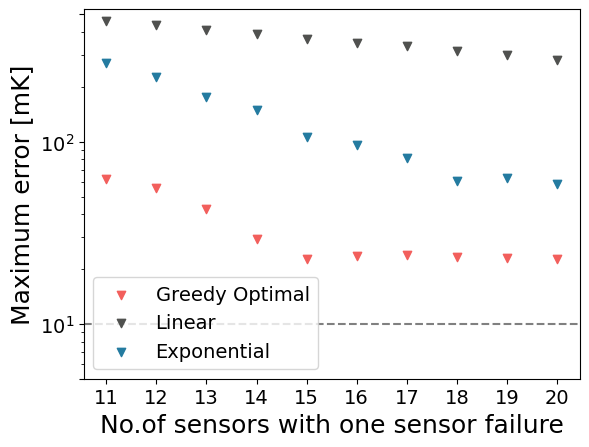

In [40]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.scatter(np.array(no_of_sensors_included),np.array(max_of_max_err_single_sensor_removal_goa_avg)*1000,c='#f25f5c',marker='v',label='Greedy Optimal')
plt.scatter(np.array(no_of_sensors_included),np.array(max_of_max_err_single_sensor_removal_linear)*1000,c='#50514f',marker='v',label='Linear')
plt.scatter(np.array(no_of_sensors_included),np.array(max_of_max_err_single_sensor_removal_logarthmic)*1000,c='#247ba0',marker='v',label='Exponential')

plt.yscale('log')
plt.xticks(no_of_sensors_included)
plt.yticks(
    [5,10, 100,500]
)
plt.xlabel('No.of sensors with one sensor failure', fontsize=18)
plt.ylabel('Maximum error [mK]', fontsize=18)
plt.axhline(y=10**1, color='grey', linestyle='--')
plt.legend( fontsize=14)

In [41]:
np.array(max_of_max_err_single_sensor_removal_goa_avg)*1000

array([62.42037549, 55.48499195, 42.49937404, 29.05726352, 22.69465012,
       23.60627456, 23.83835085, 23.23381907, 22.8641024 , 22.7428471 ])

In [42]:
np.array(max_of_max_err_single_sensor_removal_logarthmic)*1000

array([269.88166746, 226.53150644, 176.23539747, 148.78733098,
       105.75493148,  95.47064016,  81.6114478 ,  60.53613325,
        63.20629994,  58.24819976])

In [43]:
np.array(max_of_max_err_single_sensor_removal_linear)*1000

array([459.66410194, 436.23051619, 412.29163385, 388.89545058,
       366.8038978 , 349.82422486, 334.38600216, 316.36360356,
       297.70773789, 279.85036861])

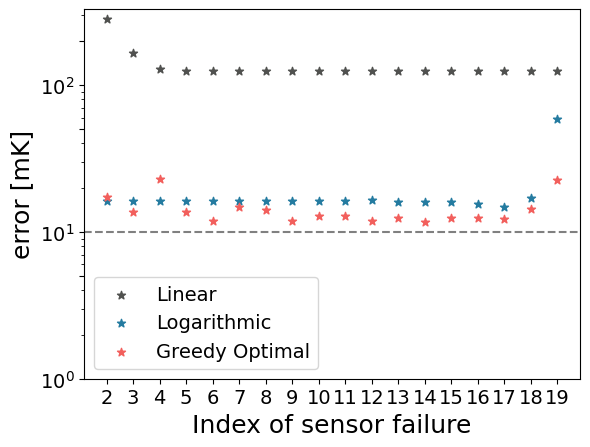

In [44]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.scatter(np.array(sensor_removal),list(max_err_sensor_removal_linear*1000),c='#50514f', marker='*',label='Linear')
plt.scatter(np.array(sensor_removal),list(max_err_sensor_removal_logarithmic*1000),c='#247ba0', marker='*',label='Logarithmic')
plt.scatter(np.array(sensor_removal),list(max_err_sensor_removal_goa_avg*1000),c='#f25f5c', marker='*',label='Greedy Optimal')
# plt.scatter(np.array(sensor_removal_11),list(max_err_sensor_removal_goa_avg_11*1000),c='#f25f5c',marker='v',label='Greedy Optimal required')
plt.yscale('log')
plt.xticks(sensor_removal)
plt.yticks(
    [1,5, 10, 50, 100, 200]
)
plt.xlabel('Index of sensor failure', fontsize=18)
plt.ylabel('error [mK]', fontsize=18)


plt.axhline(y=10**1, color='grey', linestyle='--')
plt.legend(fontsize=14, loc='lower left')